In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sqlalchemy import MetaData
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import re
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from __future__ import division
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sqlalchemy import MetaData
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import settings
import time
import glob
import pickle

In [501]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn import preprocessing 
import xgboost
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [ ]:
####

## Load working df into memory for use

In [505]:
#Get Feature Types into dictionary
#0 = ignore
#1 = numerical time series
#2 = purely categorical
#3 = numerical already
#4 = categorical time series
#5 = hold onto for now, drop when want to do model
import csv
featuretype_dict = {}
typefeature_dict = defaultdict(list)
reader = csv.reader(open('../TextFiles/feature_types.csv', 'r'))
d = {}
for k,v in reader:
    featuretype_dict[k] = int(v)
    typefeature_dict[int(v)].append(k)

In [506]:
#hours_out_list = [24, 36, 48, 60, 72]
#for hours_out in hours_out_list:
hours_out = 24
model_transformed_df = pd.read_pickle('../Pickles/' + str(hours_out) + '_out_model_df.p')

In [507]:
modelable_df = model_transformed_df.drop(list(typefeature_dict[5]), axis = 1)
model_column_names = list(modelable_df.columns)
model_column_names = [x.replace('<', "_LESS_") for x in model_column_names]
model_column_names = [x.replace('[', "") for x in model_column_names]
model_column_names = [x.replace(']', "") for x in model_column_names]
modelable_df.columns = model_column_names

In [508]:
X = modelable_df.drop(['hospital_expire_flag'], axis = 1)
y = modelable_df['hospital_expire_flag']

In [509]:
X_norm = X.apply(lambda x: (x - x.mean())/x.std(ddof=0), axis = 0)

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,
                                                    y,
                                                   test_size = 0.30)

## Grid Search for XGB

In [275]:
params = {"max_depth" : [3, 4, 5, 6, 7], 
          'n_estimators': [10, 50, 100], 
          'learning_rate': [0.1, 0.12, 0.15, 0.2, 0.3],
           'min_child_weight': [1, 3, 5]}

In [303]:
grid_xgb = GridSearchCV(xgboost.XGBClassifier(), param_grid = params, n_jobs = -1, scoring = 'f1', verbose = 2)

In [304]:
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 -   0.3s
[CV]  n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 -   0.3s
[CV] n_estimators=10, learni

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   1.9s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.0s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.3s
[CV]  n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 -   0.7s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.3s
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.4s
[CV] n_estimators=50, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, mi

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   33.4s


[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.5s
[CV] n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   5.8s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   5.5s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.6s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.1, max_depth=7, min_child_weight=1 -  10.9s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.6s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.1, max

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.3min


[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=1 -   4.0s
[CV]  n_estimators=10, learning_rate=0.15, max_depth=5, min_child_weight=5 -   0.9s
[CV] n_estimators=100, learning_rate=0.15, max_depth=5, min_child_weight=5 
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.7s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 -   1.1s
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.5s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.8s
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, ma

[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  2.5min


[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=1 -   7.0s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   0.9s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   1.0s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   1.1s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=3 -   6.8s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=3 -   7.2s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth

[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.12, 0.15, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=2)

In [305]:
print grid_xgb.best_score_
grid_xgb.best_params_

0.785959812575


{'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100}

In [306]:
grid_xgb_auc = GridSearchCV(xgboost.XGBClassifier(), param_grid = params, n_jobs = -1, scoring = 'roc_auc', verbose = 2)

In [307]:
grid_xgb_auc.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 -   0.4s
[CV]  n_estimators=10, learning_rate=

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.0s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.1s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.3s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.4s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.4s
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.4s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.1, max_depth=4, m

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   33.5s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   5.6s
[CV]  n_estimators=100, learning_rate=0.1, max_depth=7, min_child_weight=1 -  10.4s
[CV] n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.7s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.6s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   6.0s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.1, max_depth=7, min_child_weight=1 -  11.2s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.3min


[CV] n_estimators=100, learning_rate=0.15, max_depth=5, min_child_weight=5 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=5, min_child_weight=5 -   0.9s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.3s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 -   1.0s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.5s
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.6s
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 -   1.1s
[CV] n_estimators=50, learning_rate=0.15, max

[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  2.5min


[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=1 -   7.0s
[CV] n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=1 -   7.3s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   1.2s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   0.9s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=3 -   6.7s
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   1.2s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=

[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.12, 0.15, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [308]:
print grid_xgb_auc.best_score_
grid_xgb_auc.best_params_

0.94625199965


{'learning_rate': 0.12,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100}

In [325]:
grid_xgb_precision = GridSearchCV(xgboost.XGBClassifier(), param_grid = params, n_jobs = -1, scoring = 'precision', verbose = 2)

In [327]:
grid_xgb_precision.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=1 -   0.3s
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV] n_estimators=10, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV] n_estimators=10, learning_rate=0

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.0s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.0s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=1 -   2.1s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.3s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.4s
[CV] n_estimators=10, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, min_child_weight=3 -   2.5s
[CV] n_estimators=50, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.1, max_depth=4, m

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   33.4s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   5.7s
[CV] n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.1, max_depth=7, min_child_weight=1 -  10.9s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.7s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.6s
[CV] n_estimators=50, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.12, max_depth=3, min_child_weight=3 -   0.5s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=50, learning_rate=0.1, max_depth=7, min_child_weight=5 -   5.8s
[CV] n_estimators=100, learning_rate=0.12, max_depth=3, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.1, max

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.3min


[CV]  n_estimators=100, learning_rate=0.15, max_depth=4, min_child_weight=5 -   5.7s
[CV] n_estimators=100, learning_rate=0.15, max_depth=5, min_child_weight=5 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=5, min_child_weight=5 -   0.8s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.7s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 -   1.1s
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.5s
[CV] n_estimators=10, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=50, learning_rate=0.15, max_depth=5, min_child_weight=3 -   3.4s
[CV] n_estimators=50, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  n_estimators=10, learning_rate=0.15, m

[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  2.5min


[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=3 -   5.8s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=1 -   7.3s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   0.9s
[CV] n_estimators=50, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   0.8s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=10, learning_rate=0.3, max_depth=6, min_child_weight=3 -   1.1s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, min_child_weight=3 -   6.7s
[CV] n_estimators=100, learning_rate=0.3, max_depth=6, min_child_weight=3 
[CV]  n_estimators=100, learning_rate=0.3, max_depth

[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.12, 0.15, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=2)

In [328]:
print grid_xgb_precision.best_score_
grid_xgb_precision.best_params_

0.889996385438


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 50}

## Define and Run All Models

In [536]:
models = [#{'name': "GaussianNB", 'model': GaussianNB()},
          #{'name': "SVM", 'model': SVC(probability = True)}, 
          #{'name':"DecisionTree", 'model': DecisionTreeClassifier()}, 
          {'name':"RandomForest", 'model': RandomForestClassifier(n_estimators = 100,
                                                                 #max_depth = 5, 
                                                                 #oob_score = True, 
                                                                 n_jobs = -1,
                                                                 #class_weight = 'balanced'
                                                                 )},
          {'name': "XGBoosting", 'model': xgboost.XGBClassifier(max_depth = 5,
                                                        n_estimators = 100,
#                                                         n_estimators = 1000, 
                                                         learning_rate = 0.2,                                                    
#                                                        learning_rate = 0.10, 
                                                        min_child_weight = 1, 
                                                        silent = False)},
          #{'name':"KNearest", 'model': KNeighborsClassifier(3)},
          {'name':"LogisticRegression", 'model': LogisticRegression(class_weight = 'balanced')}
         ]

In [537]:
for model in models:
    if model['name'] == 'XGBoosting':
        model['model'].fit(X_train, y_train)
        model['y_pred'] = model['model'].predict(X_test)
        model['y_proba'] = model['model'].predict_proba(X_test)[:, 1]
        model['score'] = model['model'].score(X_test, y_test) 
    
        
    else:
        imp_X_train = imp.fit_transform(X_train)
        imp_X_test = imp.transform(X_test)
        model['model'].fit(imp_X_train, y_train)
        model['y_pred'] = model['model'].predict(imp_X_test)
        model['y_proba'] = model['model'].predict_proba(imp_X_test)[:, 1]
        model['score'] = model['model'].score(imp_X_test, y_test) 
    
    model['pr'] = precision_recall_curve(y_test, model['y_proba'])
    model['auc'] = roc_auc_score(y_test, model['y_proba'])
    model['roc'] = roc_curve(y_test, model['y_proba'])
    model['accuracy'] = accuracy_score(y_test, model['y_pred'])
    model['precision'] = precision_score(y_test, model['y_pred'])
    model['recall'] = recall_score(y_test, model['y_pred'])
    model['f1'] = f1_score(y_test, model['y_pred'])
    print "For the %s model: " %model['name']
    print "The accuracy is: %0.4f" %model['accuracy']
    print "The precision is: %0.4f" %model['precision']
    print "The recall is: %0.4f" %model['recall']
    print "The f1 score is: %0.4f" %model['f1']
    print "The SCORE is: %0.4f" %model['score']
    print

For the RandomForest model: 
The accuracy is: 0.7635
The precision is: 0.7119
The recall is: 0.2545
The f1 score is: 0.3750
The SCORE is: 0.7635

For the XGBoosting model: 
The accuracy is: 0.7213
The precision is: 0.5000
The recall is: 0.3333
The f1 score is: 0.4000
The SCORE is: 0.7213

For the LogisticRegression model: 
The accuracy is: 0.6791
The precision is: 0.4473
The recall is: 0.6424
The f1 score is: 0.5274
The SCORE is: 0.6791



## Using CrossVal for Metrics

In [496]:
# for model in models:
#     if model['name'] == 'XGBoosting':
#         model['cv_accuracy'] = np.mean(cross_val_score(model['model'], X_norm, y, scoring = 'accuracy'))
#         model['cv_precision'] = np.mean(cross_val_score(model['model'], X_norm, y, scoring = 'precision'))
#         model['cv_recall'] = np.mean(cross_val_score(model['model'], X_norm, y, scoring = 'recall'))
#         model['cv_f1'] = np.mean(cross_val_score(model['model'], X_norm, y, scoring = 'f1'))
#     else:
#         imp_X = imp.transform(X_norm)
#         model['cv_accuracy'] = np.mean(cross_val_score(model['model'], imp_X, y, scoring = 'accuracy'))
#         model['cv_precision'] = np.mean(cross_val_score(model['model'], imp_X, y, scoring = 'precision'))
#         model['cv_recall'] = np.mean(cross_val_score(model['model'], imp_X, y, scoring = 'recall'))
#         model['cv_f1'] = np.mean(cross_val_score(model['model'], imp_X, y, scoring = 'f1'))
        
#     print "For the %s model: " %model['name']
#     print "The accuracy is: %0.4f" %model['cv_accuracy']
#     print "The precision is: %0.4f" %model['cv_precision']
#     print "The recall is: %0.4f" %model['cv_recall']
#     print "The f1 score is: %0.4f" %model['cv_f1']
#     print

### Add LogReg/XGB ensemble

In [513]:
models.append({'name':"Ensemble - Logistic Regression/XGBoost"})
models[3]['y_proba'] = np.sqrt(models[1]['y_proba']*models[2]['y_proba'])
models[3]['pr'] = precision_recall_curve(y_test, models[3]['y_proba'])
models[3]['auc'] = roc_auc_score(y_test, models[3]['y_proba'])
models[3]['roc'] = roc_curve(y_test, models[3]['y_proba'])
    

## ROC curves

The AUC for RandomForest is 0.9328
The AUC for XGBoosting is 0.9483
The AUC for LogisticRegression is 0.9219
The AUC for Ensemble - Logistic Regression/XGBoost is 0.9450


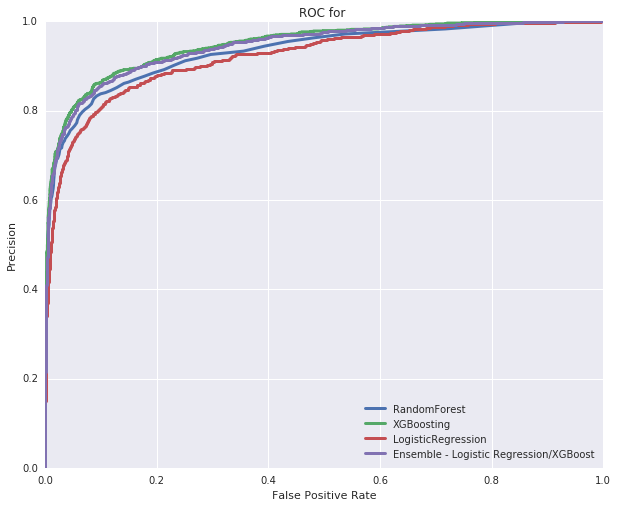

In [514]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
#f.subplots_adjust(hspace=.5)
ax.set_title('ROC for ')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('Precision')
    
for i, model in enumerate(models):
    ax.plot(model['roc'][0],model['roc'][1], linewidth = 3, label = model['name']) 
    print "The AUC for %s is %0.4f" %(model['name'], model['auc'])

ax.legend(loc = 4)    
f.show()

## PR Curves

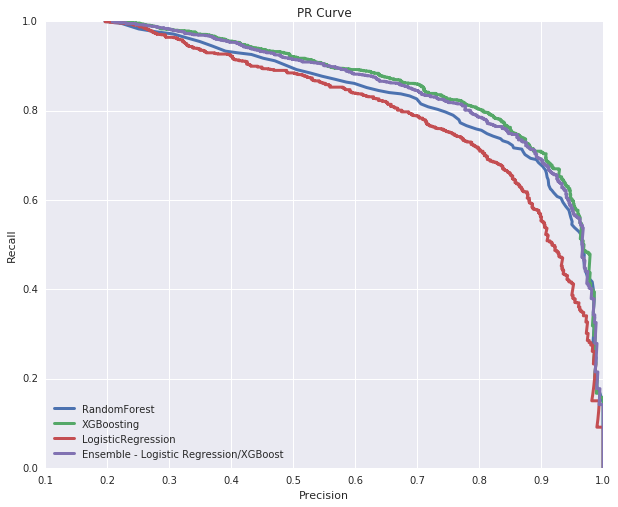

In [515]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
#f.subplots_adjust(hspace=.5)
ax.set_title('PR Curve')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
for i, model in enumerate(models):
    ax.plot(model['pr'][0],model['pr'][1], linewidth = 3, label = model['name'])
ax.legend(loc = 3)
    

## XGB Importances

In [516]:
models[1]['model'].score(X_test, y_test)

0.92744014732965008

In [517]:
importances_dict = models[1]['model'].booster().get_fscore()
total = float(sum(importances_dict.values()))
total

2494.0

In [518]:
importances_dict = {k: v/total for k,v in importances_dict.items()}
xgb_importances = importances_dict.items()
xgb_importances.sort(key = lambda x: abs(x[1]), reverse = True)

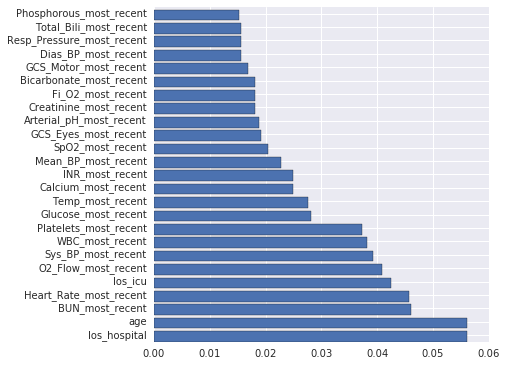

In [519]:
plt.figure(figsize = (6, 6))
names, imps = zip(*xgb_importances)
plt.barh(range(0, 25), imps[0:25])
plt.yticks(np.arange(0.5, 25.5), names[0:25])
print

In [520]:
# xgb_importances = zip(X_train.columns, models[1]['model'].feature_importances_)
# xgb_importances.sort(key = lambda x: abs(x[1]), reverse = True)
# xgb_importances

In [521]:
# f, ax = plt.subplots(figsize= (25,25))
# # plot = plt.barh()
# x = xgb.plot_importance(models[1]['model'], ax = ax)

## Random Forest to Get Importances

In [522]:
models[0]['model'].score(imp_X_test, y_test)

0.92025782688766111

In [523]:
rf_importances = zip(X_train.columns, models[0]['model'].feature_importances_)
rf_importances.sort(key = lambda x: abs(x[1]), reverse = True)
#rf_importances

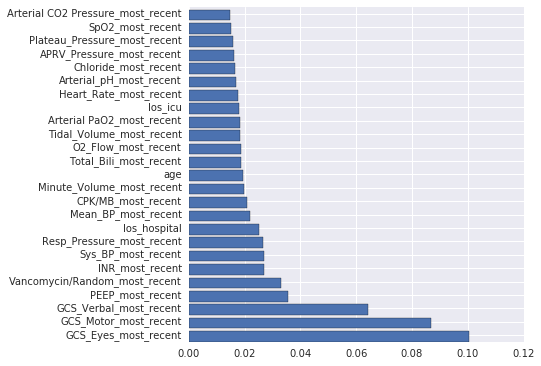

In [524]:
plt.figure(figsize = (6, 6))
names, imps = zip(*rf_importances)
plt.barh(range(0, 25), imps[0:25])
plt.yticks(np.arange(0.5, 25.5), names[0:25])
print

## Logistic Regression to get Coefficients

In [525]:
models[2]['model'].score(imp_X_test, y_test)

0.88139963167587476

In [526]:
lr_coef = zip(X_train.columns, models[2]['model'].coef_[0])
lr_coef.sort(key = lambda x: abs(x[1]), reverse = True)

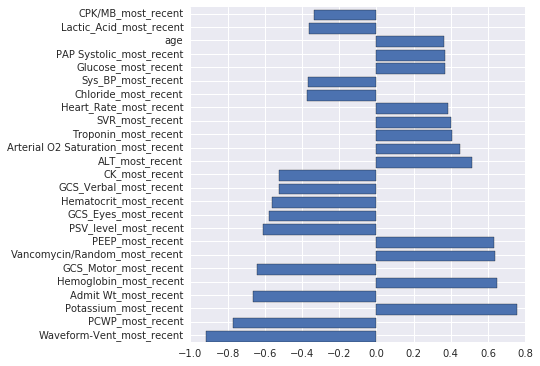

In [528]:
plt.figure(figsize = (6, 6))
names, coefs = zip(*lr_coef)
plt.barh(range(0, 25), coefs[0:25])
plt.yticks(np.arange(0.5, 25.5), names[0:25])
print

## Run XGB to predict mortality at different intervals

#### Create dictionary of different mortalities to utilize
    KEY = X hour mortality (i.e. 24, 36, etc)
    VALUE = dictionary of mappings: i.e. X_train given the train set for that particular mortality, etc
    

In [529]:
hours_dict = {}
hours_dict_on_24 = {}
hours_out_list = [24, 36, 48, 60, 72, 168, 336]
for hours_out in hours_out_list:
    model_transformed_df = pd.read_pickle('../Pickles/' + str(hours_out) + '_out_model_df.p')

    modelable_df = model_transformed_df.drop(list(typefeature_dict[5]), axis = 1)
    model_column_names = list(modelable_df.columns)
    model_column_names = [x.replace('<', "_LESS_") for x in model_column_names]
    model_column_names = [x.replace('[', "") for x in model_column_names]
    model_column_names = [x.replace(']', "") for x in model_column_names]
    modelable_df.columns = model_column_names
    X = modelable_df.drop(['hospital_expire_flag'], axis = 1)
    X.los_icu = X.los_icu - float(hours_out)/24
    X.los_hospital = X.los_hospital - float(hours_out)/24
    
    y = modelable_df['hospital_expire_flag']
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.30)
    cur_hour_dict = {}
    cur_hour_dict['X_train'] = X_train
    cur_hour_dict['X_test'] = X_test
    cur_hour_dict['X'] = X
    
    cur_hour_dict['y_train'] = y_train
    cur_hour_dict['y_test'] = y_test
    cur_hour_dict['y'] = y
    
    cur_hour_dict['name'] = str(round(float(hours_out/24),1)) + "-day mortality"
    hours_dict_on_24[hours_out] = cur_hour_dict
    hours_dict[hours_out] = cur_hour_dict.copy()

In [530]:
for t in hours_out_list:
    print len(hours_dict_on_24[t]['X'])

18097
17776
15531
12943
11265
4924
1973


#### Create XGB classifier

In [531]:
import xgboost

In [532]:
xgb = xgboost.XGBClassifier(max_depth = 5,
                                                        n_estimators = 100,
#                                                         n_estimators = 1000, 
                                                         learning_rate = 0.1,                                                    
#                                                        learning_rate = 0.10, 
                                                        min_child_weight = 1, 
                                                        silent = False)
xgb_on_24 = xgboost.XGBClassifier(max_depth = 5,
                                                        n_estimators = 100,
#                                                         n_estimators = 1000, 
                                                         learning_rate = 0.1,                                                    
#                                                        learning_rate = 0.10, 
                                                        min_child_weight = 1, 
                                                        silent = False)

#### Run same XGB Classifier on all dataframes (predicting 24, 36, etc. hr mortality)

TRAIN/TEST RAN ON SAME:
For the 1.0-day mortality model: 
The accuracy is: 0.9241
The precision is: 0.8602
The recall is: 0.7094
The f1 score is: 0.7775

ALL TEST RAN ON 24-HR MORTALITY MODEL:
For the 1.0-day mortality model: 
The accuracy is: 0.9481
The precision is: 0.9296
The recall is: 0.7856
The f1 score is: 0.8515

TRAIN/TEST RAN ON SAME:
For the 2.0-day mortality model: 
The accuracy is: 0.9019
The precision is: 0.8316
The recall is: 0.6242
The f1 score is: 0.7131

ALL TEST RAN ON 24-HR MORTALITY MODEL:
For the 2.0-day mortality model: 
The accuracy is: 0.8969
The precision is: 0.7731
The recall is: 0.6794
The f1 score is: 0.7232

TRAIN/TEST RAN ON SAME:
For the 3.0-day mortality model: 
The accuracy is: 0.8713
The precision is: 0.8073
The recall is: 0.5744
The f1 score is: 0.6712

ALL TEST RAN ON 24-HR MORTALITY MODEL:
For the 3.0-day mortality model: 
The accuracy is: 0.8441
The precision is: 0.6609
The recall is: 0.6624
The f1 score is: 0.6617

TRAIN/TEST RAN ON SAME:
For the

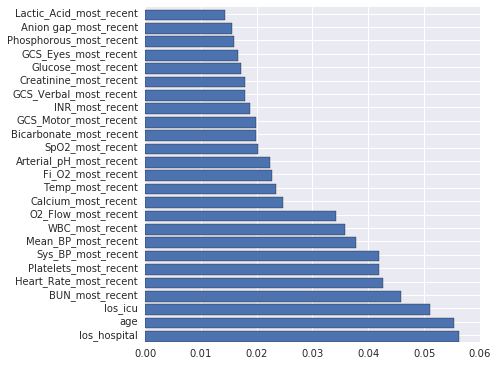

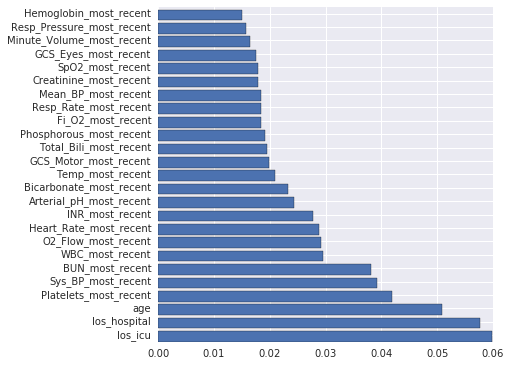

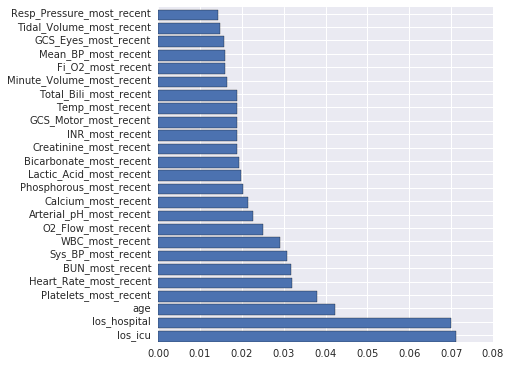

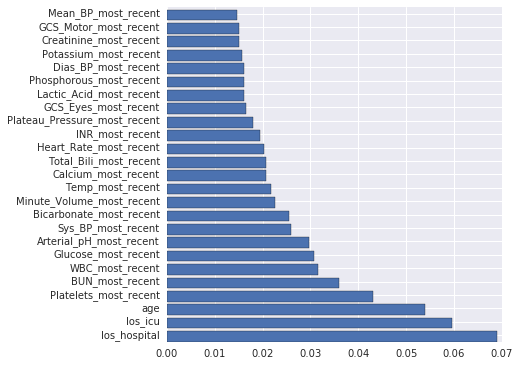

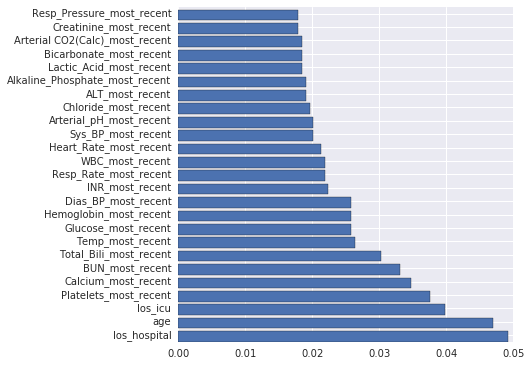

In [533]:
list_to_plot = [24, 48, 72, 168, 336]
xgb_on_24.fit(hours_dict_on_24[24]['X_train'], hours_dict_on_24[24]['y_train'])

for hours_out in list_to_plot:
    
    xgb.fit(hours_dict[hours_out]['X_train'], hours_dict[hours_out]['y_train'])
    hours_dict[hours_out]['y_pred'] = xgb.predict(hours_dict[hours_out]['X_test'])
    hours_dict[hours_out]['y_proba'] = xgb.predict_proba(hours_dict[hours_out]['X_test'])[:, 1]
    hours_dict[hours_out]['accuracy'] = accuracy_score(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_pred'])
    hours_dict[hours_out]['precision'] = precision_score(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_pred'])
    hours_dict[hours_out]['recall'] = recall_score(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_pred'])
    hours_dict[hours_out]['f1'] = f1_score(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_pred'])
    
    hours_dict_on_24[hours_out]['y_pred'] = xgb_on_24.predict(hours_dict_on_24[hours_out]['X'])
    hours_dict_on_24[hours_out]['y_proba'] = xgb_on_24.predict_proba(hours_dict_on_24[hours_out]['X'])[:, 1]
    hours_dict_on_24[hours_out]['accuracy'] = accuracy_score(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_pred'])
    hours_dict_on_24[hours_out]['precision'] = precision_score(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_pred'])
    hours_dict_on_24[hours_out]['recall'] = recall_score(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_pred'])
    hours_dict_on_24[hours_out]['f1'] = f1_score(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_pred'])
    
    print "TRAIN/TEST RAN ON SAME:"
    print "For the %s model: " %hours_dict[hours_out]['name']
    print "The accuracy is: %0.4f" %hours_dict[hours_out]['accuracy']
    print "The precision is: %0.4f" %hours_dict[hours_out]['precision']
    print "The recall is: %0.4f" %hours_dict[hours_out]['recall']
    print "The f1 score is: %0.4f" %hours_dict[hours_out]['f1']
    print
    
    print "ALL TEST RAN ON 24-HR MORTALITY MODEL:"
    print "For the %s model: " %hours_dict_on_24[hours_out]['name']
    print "The accuracy is: %0.4f" %hours_dict_on_24[hours_out]['accuracy']
    print "The precision is: %0.4f" %hours_dict_on_24[hours_out]['precision']
    print "The recall is: %0.4f" %hours_dict_on_24[hours_out]['recall']
    print "The f1 score is: %0.4f" %hours_dict_on_24[hours_out]['f1']
    print
    
    importances_dict = xgb.booster().get_fscore()
    total = float(sum(importances_dict.values()))
    importances_dict = {k: v/total for k,v in importances_dict.items()}
    xgb_importances = importances_dict.items()
    xgb_importances.sort(key = lambda x: abs(x[1]), reverse = True)
    plt.figure(figsize = (6, 6))
    names, imps = zip(*xgb_importances)
    plt.barh(range(0, 25), imps[0:25])
    plt.yticks(np.arange(0.5, 25.5), names[0:25])
    

The AUC for 1.0-day mortality is 0.9504
The AUC for 2.0-day mortality is 0.9233
The AUC for 3.0-day mortality is 0.9017
The AUC for 7.0-day mortality is 0.8524
The AUC for 14.0-day mortality is 0.7565
The AUC for 2.0-day mortality is 0.9272
The AUC for 3.0-day mortality is 0.8868
The AUC for 7.0-day mortality is 0.7894
The AUC for 14.0-day mortality is 0.6977


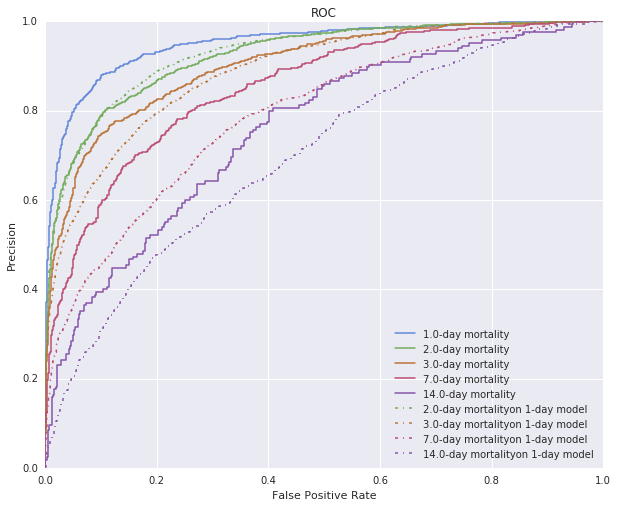

In [534]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
#f.subplots_adjust(hspace=.5)
ax.set_title('ROC')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('Precision')
colors = ["#6287da",
"#72ac5c",
"#bb7438",
"#b94b75",
"#8653aa"]
i = 0
for hours_out in list_to_plot:
    hours_dict[hours_out]['auc'] = roc_auc_score(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_proba'])
    hours_dict[hours_out]['roc'] = roc_curve(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_proba'])
    ax.plot(hours_dict[hours_out]['roc'][0],hours_dict[hours_out]['roc'][1], c = colors[i], linewidth = 1.5, label = hours_dict[hours_out]['name']) 
    print "The AUC for %s is %0.4f" %(hours_dict[hours_out]['name'], hours_dict[hours_out]['auc'])
    i+= 1

i = 0
for hours_out in list_to_plot:
    if hours_out != 24:
        hours_dict_on_24[hours_out]['auc'] = roc_auc_score(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_proba'])
        hours_dict_on_24[hours_out]['roc'] = roc_curve(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_proba'])
        label_24 = hours_dict_on_24[hours_out]['name'] + "on 1-day model"
        ax.plot(hours_dict_on_24[hours_out]['roc'][0],hours_dict_on_24[hours_out]['roc'][1], '-.', c = colors[i], linewidth = 1.5, label = label_24) 
        print "The AUC for %s is %0.4f" %(hours_dict_on_24[hours_out]['name'], hours_dict_on_24[hours_out]['auc'])
    i += 1

ax.legend(loc = 4)    
f.show()

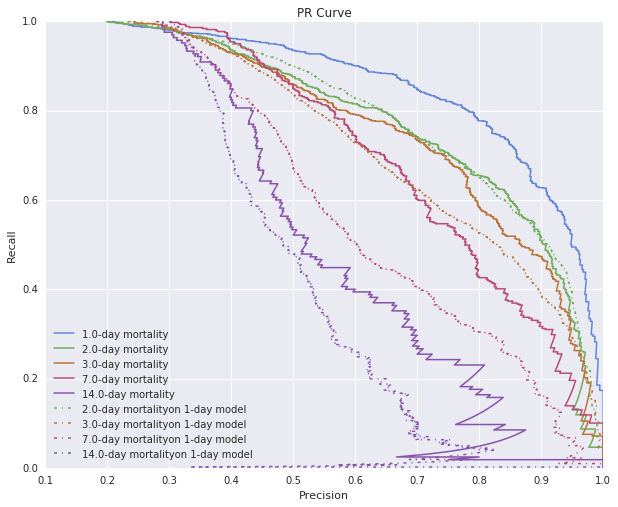

In [535]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
#f.subplots_adjust(hspace=.5)
ax.set_title('PR Curve')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')

colors = ["#6287da",
"#72ac5c",
"#bb7438",
"#b94b75",
"#8653aa"]
i = 0
for hours_out in list_to_plot:
    hours_dict[hours_out]['pr'] = precision_recall_curve(hours_dict[hours_out]['y_test'], hours_dict[hours_out]['y_proba'])
    ax.plot(hours_dict[hours_out]['pr'][0],hours_dict[hours_out]['pr'][1], c = colors[i], linewidth = 1.5, label = hours_dict[hours_out]['name']) 
    i+= 1

i = 0
for hours_out in list_to_plot:
    if hours_out != 24:
        hours_dict_on_24[hours_out]['pr'] = precision_recall_curve(hours_dict_on_24[hours_out]['y'], hours_dict_on_24[hours_out]['y_proba'])
        label_24 = hours_dict_on_24[hours_out]['name'] + "on 1-day model"
        ax.plot(hours_dict_on_24[hours_out]['pr'][0],hours_dict_on_24[hours_out]['pr'][1], '-.', c = colors[i], linewidth = 1.5, label = label_24) 
    i += 1

ax.legend(loc = 3)
    